# Gaussian Mixture Models

In this notebook we will investigate Gaussian Mixture Models

I must point out that no efforts have been made to optimise this code for either efficiency or elegance, and some of you will no doubt be able to find ways in which it could be improved.

**CAUTION** these notebooks are great, but you must be careful when running the cells out of order, especially if you are using mutable variables

In [0]:
!pip install -q mnist # this line instructs colab to install mnist
import matplotlib.pyplot as plt
import mnist
import numpy as np
from scipy.stats import norm
from numpy.random import normal
np.random.seed(123)

Define the parameters of the data generating clusters

Text(0, 0.5, 'p(x)')

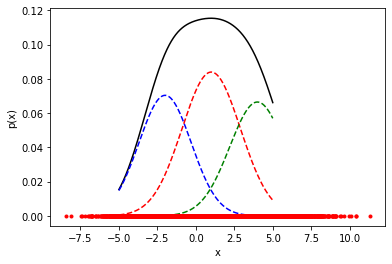

In [2]:
# Means
mean0 = -2
mean1 = 1
mean2 = 4
# Standard deviations
std0 = 1.7
std1 = 1.9
std2 = 1.8
# Mixing coefficients
A0 = 0.3
A1 = 0.4
A2 = 0.3
# Each tuple is (A, mu, sigma)
#components = [(0.3,-2,1),(0.4,1,0.7),(0.3,4,0.8)]

# number of points to sample
N = 10000

# Generate the data
#x = [normal(i[1], i[2], int(i[0*N])) for i in components]
x1 = normal(mean0, std0, int(A0*N))
x2 = normal(mean1, std1, int(A1*N))
x3 = normal(mean2, std2, int(A2*N))

# Combine the samples
sample = np.concatenate([x1,x2,x3])

# Plot everything
x = np.linspace(-5,5,500)
p1 = A0*norm.pdf(x,loc=[mean0],scale=std0)
p2 = A1*norm.pdf(x,loc=[mean1],scale=std1)
p3 = A2*norm.pdf(x,loc=[mean2],scale=std2)
p = p1+p2+p3
plt.plot(x,p,'k-')
plt.plot(x,p1,'b--')
plt.plot(x,p2,'r--')
plt.plot(x,p3,'g--')
plt.plot(sample,0*sample,'r.')
plt.xlabel('x')
plt.ylabel('p(x)')

Now we learn the GMM

In [3]:
from sklearn.mixture import GaussianMixture
GM = GaussianMixture(n_components=3).fit(sample.reshape(-1,1))
print(GM.means_)
print(np.sqrt(GM.covariances_))
print(GM.weights_)

[[ 4.26775303]
 [-1.98323279]
 [ 1.22779538]]
[[[1.64782091]]

 [[1.59139605]]

 [[1.45195093]]]
[0.29538611 0.34465568 0.35995821]


Plot the result

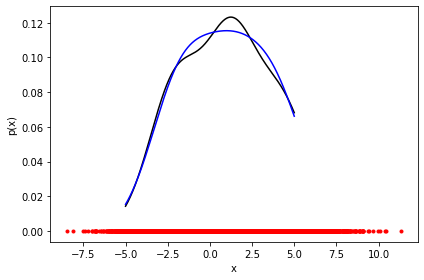

In [4]:
gmpdf1 = GM.weights_[0]*norm.pdf(x,loc=GM.means_[0],scale=np.power(GM.covariances_[0][0][0],0.5))
gmpdf2 = GM.weights_[1]*norm.pdf(x,loc=GM.means_[1],scale=np.power(GM.covariances_[1][0][0],0.5))
gmpdf3 = GM.weights_[2]*norm.pdf(x,loc=GM.means_[2],scale=np.power(GM.covariances_[2][0][0],0.5))
gmpdf = gmpdf1+gmpdf2+gmpdf3
plt.plot(x,gmpdf,'k-')
plt.plot(x,p,'b-')
plt.plot(sample,0*sample,'r.')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.tight_layout()
plt.savefig('gmm-example-data-fit.pdf')

Plot the responsibilities

Text(0, 0.5, 'r(x)')

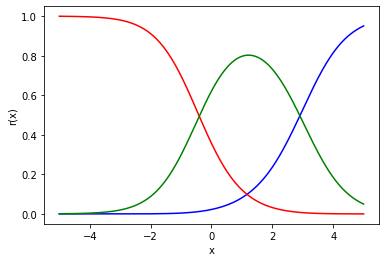

In [5]:
probs = GM.predict_proba(x.reshape(-1,1))
plt.plot(x,probs[:,0],'b-')
plt.plot(x,probs[:,1],'r-')
plt.plot(x,probs[:,2],'g-')
plt.xlabel('x')
plt.ylabel('r(x)')